# 3. Escreva um código que inicializa 8 estados quânticos psi_0, psi_1, ... psi_7 da seguinte maneira.

1. Cada psi_i deve ser o produto tensorial da string |i> em binário com o valor |0> ou o valor |1>, dependendo se i é primo ou não, respectivamente.

Por exemplo,
psi_0 = |000>|0>
psi_1= |001>|0>
psi_2 = |010>|1>
...
psi_7 = |111>|1>

Para realizar o produto tensorial, utilize obrigatoriamente o método tensor() como em https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems#tensor-products

Imprima, no jupyter, em formato Latex, cada um dos 8 estados.

2. Crie um estado psi de 4 qubits que seja a superposição dos 8 estados psi_0, ..., psi_7, cada um com amplitude 1 / sqrt(8). Se tiver dificuldade sobre como preparar essa superposição, consulte: https://quantumcomputing.stackexchange.com/questions/26745/how-to-calculate-the-sum-of-sum-limits-j-langle-ab-j-rangle-c-j

3. Realize o seguinte experimento 1000 vezes:

a) Meça o 4º qubit. Se for igual a 0, não faça nada.
b) Se for igual a 1, meça os outros 3 qubits e incremente um contador associado às ocorrências do número primo correspondente.

Após os experimentos, plote um histograma sobre as ocorrências de todos os primos de 2 a 7.

Para ver como medir uma faixa específica de qubits, consulte: https://quantumcomputing.stackexchange.com/questions/29342/qiskit-measure-all-or-measure

Veja que seu circuito precisará de 4 qubits e 4 bits clássicos ;)

In [48]:
from qiskit.quantum_info import Statevector, Operator
from numpy import sqrt
from IPython.display import display
from qiskit import QuantumCircuit

In [49]:
zero, one = Statevector.from_label("0"), Statevector.from_label("1")
zero.tensor(one).draw("latex")

<IPython.core.display.Latex object>

In [50]:
plus = Statevector.from_label("+")
i_state = Statevector([1 / sqrt(2), 1j / sqrt(2)])
psi = plus.tensor(i_state)

psi.draw("latex")   

<IPython.core.display.Latex object>

In [51]:
def isPrime(n):
    if n==2 or n==3: return True
    if n%2==0 or n<2: return False
    for i in range(3, int(n**0.5)+1, 2):   # only odd numbers
        if n%i==0:
            return False    

    return True

In [52]:
psi = {}
counter ={}
for i in range(8):
    binary = f'{i:03b}'
    arg = one if isPrime(i) else zero
    psi[i] = Statevector.from_label(binary).tensor(arg)
    counter[binary] = 0

In [53]:
for item in psi:
    display(psi[item].draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [54]:
amplitude = 1 / sqrt(8)
for key in range(len(psi)-1):
    psi[0] += psi[key+1]
psi_state = amplitude * psi[0]
display(psi_state.draw("latex"))


<IPython.core.display.Latex object>

In [55]:
for i in range(1000):
    result, new_sv = psi_state.measure([0])  # measure qubit 0
    if result == '1':
        _result, _new_sv = new_sv.measure([1, 2, 3])
        counter[_result] += 1

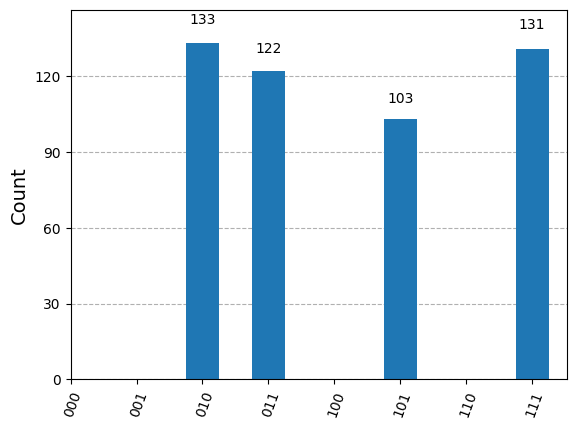

In [56]:
from qiskit.visualization import plot_histogram
plot_histogram(counter)